# Part A -

### Export libraries and open intial data

In [1]:
import pandas as pd
import numpy as np
from random import random
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import preprocessing
import pydotplus
from io import StringIO
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
super_hero_char = pd.read_csv('SuperHeroCharacteristicsData.csv', encoding='latin1')

In [3]:
super_hero_char.head()

,id,name,powerstats__intelligence,powerstats__strength,powerstats__speed,powerstats__durability,powerstats__power,powerstats__combat,biography__full-name,biography__alter__egos,...,biography__aliases__011,biography__aliases__012,biography__aliases__013,biography__aliases__014,biography__aliases__015,biography__aliases__016,biography__aliases__017,biography__aliases__018,biography__aliases__019,biography__aliases__020
0,1,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0,Richard Milhouse Jones,No alter egos found.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Abe Sapien,88.0,28.0,35.0,65.0,100.0,85.0,Abraham Sapien,No alter egos found.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Abin Sur,50.0,90.0,53.0,64.0,99.0,65.0,NaN,No alter egos found.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Abomination,63.0,80.0,53.0,90.0,62.0,95.0,Emil Blonsky,No alter egos found.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Abraxas,88.0,63.0,83.0,100.0,100.0,55.0,Abraxas,No alter egos found.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### droping un related columns and dealing NaN rows

In [4]:
# Drop all the rows (heroes) which not from Marvel or DC comics.
super_hero_char.drop(super_hero_char[(super_hero_char.biography__publisher != "Marvel Comics")
                                     & (super_hero_char.biography__publisher != "DC Comics")].index, inplace=True)


In [5]:
# list(super_hero_char.columns)
# drop the columns that wont be relevnt for our prediction
col_to_drop = ['id',
 'biography__full-name',
 'biography__aliases__001',
 'biography__place-of-birth',
 'biography__first-appearance',
 'appearance__height__001',
 'appearance__weight__001',
 'work__occupation',
 'work__base',
 'connections__group__affiliation',
 'connections__relatives',
 'biography__aliases__002',
 'biography__aliases__003',
 'biography__aliases__004',
 'biography__aliases__005',
 'biography__aliases__006',
 'biography__aliases__007',
 'biography__aliases__008',
 'biography__aliases__009',
 'biography__aliases__010',
 'biography__aliases__011',
 'biography__aliases__012',
 'biography__aliases__013',
 'biography__aliases__014',
 'biography__aliases__015',
 'biography__aliases__016',
 'biography__aliases__017',
 'biography__aliases__018',
 'biography__aliases__019',
 'biography__aliases__020']

super_hero_char.drop(col_to_drop, axis=1, inplace=True)


In [6]:
# making sure no NaN/Na vals will remain in our dataset
super_hero_char.isnull().sum()

name                          0
powerstats__intelligence     66
powerstats__strength         34
powerstats__speed            66
powerstats__durability       66
powerstats__power            66
powerstats__combat           66
biography__alter__egos        0
biography__publisher          0
biography__alignment          0
appearance__gender            0
appearance__race            183
appearance__height__002       0
appearance__weight__002       0
appearance__eye__color        0
appearance__hair__color       0
dtype: int64

In [7]:
# Drop all the rows (heroes) which dont have the apropriate values.. 
# Unfortunately they are more than 7% from the data, so we have to remove them
drop_na_from = ['powerstats__intelligence', 'powerstats__speed', 'powerstats__durability',
                'powerstats__power', 'powerstats__combat']
super_hero_char = super_hero_char.dropna(axis=0, subset=drop_na_from)

# Unfortunately appearance__race column it 30% empty so we will remove the whole column instead of more 30% of the data
#we cannot fill the data with avg values for the same reason

super_hero_char.drop('appearance__race', axis=1, inplace=True)

In [8]:
super_hero_char.isnull().sum()

name                        0
powerstats__intelligence    0
powerstats__strength        0
powerstats__speed           0
powerstats__durability      0
powerstats__power           0
powerstats__combat          0
biography__alter__egos      0
biography__publisher        0
biography__alignment        0
appearance__gender          0
appearance__height__002     0
appearance__weight__002     0
appearance__eye__color      0
appearance__hair__color     0
dtype: int64

### Continue Preprocessing and Encode

In [9]:
super_hero_char.head()

,name,powerstats__intelligence,powerstats__strength,powerstats__speed,powerstats__durability,powerstats__power,powerstats__combat,biography__alter__egos,biography__publisher,biography__alignment,appearance__gender,appearance__height__002,appearance__weight__002,appearance__eye__color,appearance__hair__color
0,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0,No alter egos found.,Marvel Comics,good,Male,203 cm,441 kg,Yellow,No Hair
2,Abin Sur,50.0,90.0,53.0,64.0,99.0,65.0,No alter egos found.,DC Comics,good,Male,185 cm,90 kg,Blue,No Hair
3,Abomination,63.0,80.0,53.0,90.0,62.0,95.0,No alter egos found.,Marvel Comics,bad,Male,203 cm,441 kg,Green,No Hair
4,Abraxas,88.0,63.0,83.0,100.0,100.0,55.0,No alter egos found.,Marvel Comics,bad,Male,0 cm,0 kg,Blue,Black
5,Absorbing Man,38.0,80.0,25.0,100.0,98.0,64.0,No alter egos found.,Marvel Comics,bad,Male,193 cm,122 kg,Blue,No Hair


In [55]:
super_hero_char.describe()

,powerstats__intelligence,powerstats__strength,powerstats__speed,powerstats__durability,powerstats__power,powerstats__combat,biography__alter__egos,biography__publisher,biography__alignment,appearance__gender,appearance__eye__color,appearance__hair__color
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,65.017115,45.242054,41.753056,61.635697,67.298289,61.880196,0.004890,0.359413,0.709046,0.325183,3.180929,5.298289
std,19.803872,34.029797,24.779323,29.347509,28.636652,21.964160,0.069843,0.480416,0.556549,0.523353,1.578510,5.081109
min,8.000000,4.000000,1.000000,1.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,10.000000,23.000000,35.000000,45.000000,42.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,63.000000,34.000000,35.000000,64.000000,69.000000,64.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000
75%,75.000000,80.000000,53.000000,90.000000,100.000000,80.000000,0.000000,1.000000,1.000000,1.000000,4.000000,10.000000
max,100.000000,100.000000,100.000000,110.000000,100.000000,101.000000,1.000000,1.000000,2.000000,2.000000,9.000000,13.000000


In [10]:
super_hero_char.biography__publisher.value_counts()

Marvel Comics    262
DC Comics        147
Name: biography__publisher, dtype: int64

In [11]:
change_dict = {'biography__publisher': {'Marvel Comics' : 0,
                                        'DC Comics' : 1}}
super_hero_char = super_hero_char.replace(to_replace=change_dict)

In [12]:
super_hero_char.biography__alter__egos.value_counts()

No alter egos found.          407
Rune King Thor                  1
Superman Prime One-Million      1
Name: biography__alter__egos, dtype: int64

In [13]:
change_dict = {'biography__alter__egos': {'No alter egos found.' : 0,
                                          'Superman Prime One-Million' : 1,
                                          'Rune King Thor' : 1}}
super_hero_char = super_hero_char.replace(to_replace=change_dict)

In [14]:
super_hero_char.biography__alignment.value_counts()

good       248
bad        140
neutral     21
Name: biography__alignment, dtype: int64

In [15]:
change_dict = {'biography__alignment': {'bad' : 0,
                                        'good' : 1,
                                        'neutral' : 2}}
super_hero_char = super_hero_char.replace(to_replace=change_dict)

In [16]:
super_hero_char.appearance__gender.value_counts()

Male      287
Female    111
-          11
Name: appearance__gender, dtype: int64

In [17]:
change_dict = {'appearance__gender': {'Male' : 0,
                                      'Female' : 1,
                                      '-' : 2}} #sexualy undefined
super_hero_char = super_hero_char.replace(to_replace=change_dict)

In [18]:
super_hero_char.appearance__height__002.value_counts()

0 cm            55
188 cm          40
183 cm          36
180 cm          29
185 cm          29
175 cm          25
178 cm          23
168 cm          19
165 cm          17
193 cm          16
198 cm          15
170 cm          14
173 cm          12
191 cm          10
196 cm          10
201 cm           9
203 cm           5
213 cm           4
163 cm           4
244 cm           3
155 cm           3
157 cm           2
226 cm           2
206 cm           2
218 cm           2
305 cm           2
366 cm           2
61.0 meters      1
975 cm           1
62.5 meters      1
64 cm            1
179 cm           1
876 cm           1
287 cm           1
279 cm           1
160 cm           1
229 cm           1
304.8 meters     1
122 cm           1
267 cm           1
257 cm           1
234 cm           1
701 cm           1
15.2 meters      1
142 cm           1
211 cm           1
Name: appearance__height__002, dtype: int64

In [19]:
# conver all heights to the same units and to nummerical value
for i, row in super_hero_char.iterrows():
    if 'meters' in row['appearance__height__002'] :
        val = row['appearance__height__002']
        val = val.replace('meters', '')
        num = float(val) * 100
#         val = str(int(num)) + ' cm' //if needed to enter the height in cm
        super_hero_char.at[i, 'appearance__height__002'] = int(num)
    else :
        num = row['appearance__height__002']
        num = num.replace('cm', '')
        super_hero_char.at[i, 'appearance__height__002'] = int(num)


In [20]:
super_hero_char.appearance__weight__002.value_counts()

0 kg       60
81 kg      17
90 kg      16
79 kg      15
54 kg      14
           ..
116 kg      1
187 kg      1
181 kg      1
45 kg       1
16 tons     1
Name: appearance__weight__002, Length: 115, dtype: int64

In [21]:
# conver all weights to the same units and to nummerical value
for i, row in super_hero_char.iterrows():
    if 'tons' in row['appearance__weight__002'] :
        val = row['appearance__weight__002']
        val = val.replace('tons', '')
        num = float(val) * 1000
#         val = str(int(num)) + ' kg' //if needed to enter the weight in kg
        super_hero_char.at[i, 'appearance__weight__002'] = int(num)
    else :
        num = row['appearance__weight__002']
        num = num.replace('kg', '')
        super_hero_char.at[i, 'appearance__weight__002'] = int(float(num))


In [22]:
super_hero_char.appearance__eye__color.value_counts()

Blue      148
Brown      88
Green      60
Red        41
Black      21
Yellow     21
White      18
Grey        6
Purple      4
Orange      2
Name: appearance__eye__color, dtype: int64

In [23]:
super_hero_char.appearance__hair__color.value_counts()

Black      118
No Hair     72
Brown       65
Blond       62
Red         34
White       19
Auburn       9
Green        7
Grey         6
Purple       6
Blue         4
Orange       3
Yellow       2
Pink         2
Name: appearance__hair__color, dtype: int64

In [24]:
colorsEncoder = {'Black' : 0, 'White' : 1,
                 'Brown' : 2, 'Blue' : 3,
                 'Green' : 4, 'Red' : 5,
                 'Yellow' : 6, 'Grey' : 7, 
                 'Purple' : 8, 'Orange' : 9, 
                 'Blond' : 10, 'Auburn' : 11, 
                 'Pink' : 12, 'No Hair' : 13}
change_dict = {'appearance__eye__color': colorsEncoder, 'appearance__hair__color' : colorsEncoder}
super_hero_char = super_hero_char.replace(to_replace=change_dict)

In [25]:
super_hero_char

,name,powerstats__intelligence,powerstats__strength,powerstats__speed,powerstats__durability,powerstats__power,powerstats__combat,biography__alter__egos,biography__publisher,biography__alignment,appearance__gender,appearance__height__002,appearance__weight__002,appearance__eye__color,appearance__hair__color
0,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0,0,0,1,0,203,441,6,13
2,Abin Sur,50.0,90.0,53.0,64.0,99.0,65.0,0,1,1,0,185,90,3,13
3,Abomination,63.0,80.0,53.0,90.0,62.0,95.0,0,0,0,0,203,441,4,13
4,Abraxas,88.0,63.0,83.0,100.0,100.0,55.0,0,0,0,0,0,0,3,0
5,Absorbing Man,38.0,80.0,25.0,100.0,98.0,64.0,0,0,0,0,193,122,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,X-23,75.0,24.0,42.0,100.0,55.0,95.0,0,0,1,1,155,50,4,0
646,X-Man,88.0,53.0,53.0,95.0,100.0,84.0,0,0,1,0,175,61,3,2
649,Ymir,50.0,100.0,27.0,100.0,98.0,28.0,0,0,1,0,30480,0,1,13
651,Zatanna,81.0,10.0,23.0,28.0,100.0,56.0,0,1,1,1,170,57,3,0


# Part B

### Adding popularity

In [26]:
# exports super heroes names to csv in order for us to fill (according to users) the popularity of them
names = pd.DataFrame(super_hero_char.name)
# names.to_csv('namesAndPopularity.csv', index=False)

In [27]:
# append the popularity column
name_and_popularity = pd.read_csv('namesAndPopularity.csv', encoding='latin1')

In [28]:
super_hero_df = pd.merge(super_hero_char, name_and_popularity, how='inner', on='name')

# also Encode popularity
change_dict = {'popularity': {'low' : 0,
                              'high' : 1}}
super_hero_df = super_hero_df.replace(to_replace=change_dict)

test_df = super_hero_df.copy()

# now we can drop the names column because we dont use it any more.
super_hero_df.drop('name', axis=1, inplace=True)


In [29]:
pop = super_hero_df['popularity']
# pop.value_counts()
low, high = pop.value_counts(normalize=True)[0] ,pop.value_counts(normalize=True)[1]

print(f"Percentage of high super hero popularity: {int(high * 100)}%")
print(f"Percentage of low super hero popularity: {int(low * 100)}%")

Percentage of high super hero popularity: 40%
Percentage of low super hero popularity: 59%


<AxesSubplot:title={'center':'Correlation of Features'}>

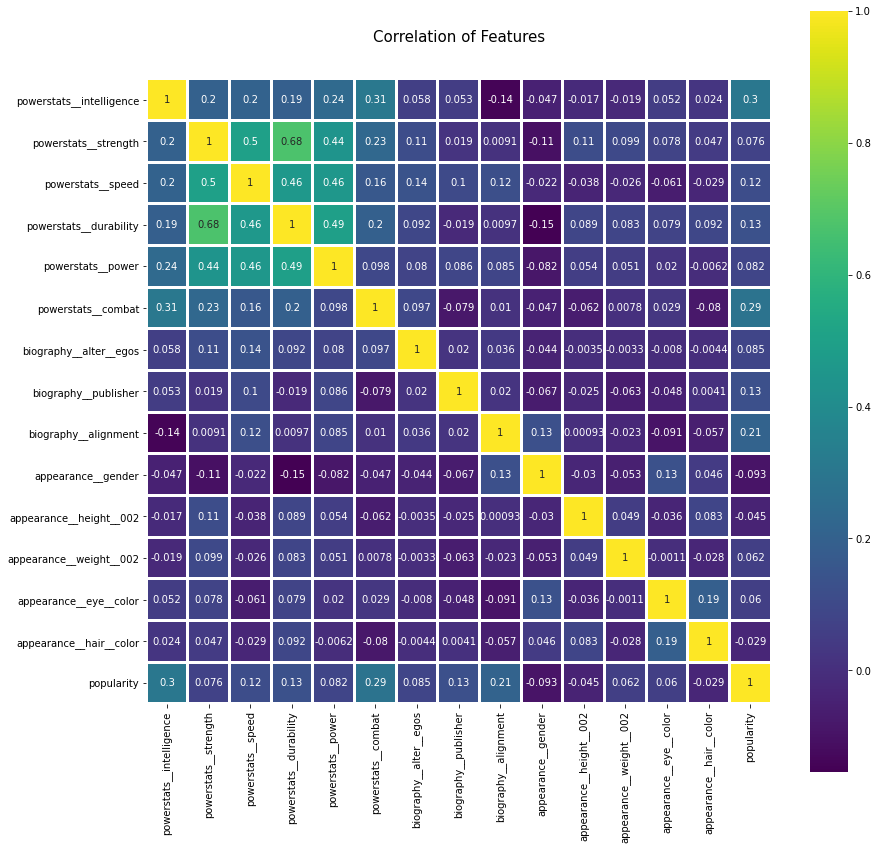

In [30]:
# lets lock on some correlations
plt.figure(figsize=(14, 14))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(super_hero_df.astype(float).corr(),
        linewidths=2,
        vmax=1.0, 
        square=True, 
        cmap=plt.cm.viridis, 
        linecolor='white', 
        annot=True)

# Part B

In [31]:
list(super_hero_df.columns)

['powerstats__intelligence',
 'powerstats__strength',
 'powerstats__speed',
 'powerstats__durability',
 'powerstats__power',
 'powerstats__combat',
 'biography__alter__egos',
 'biography__publisher',
 'biography__alignment',
 'appearance__gender',
 'appearance__height__002',
 'appearance__weight__002',
 'appearance__eye__color',
 'appearance__hair__color',
 'popularity']

In [32]:
cols = list(super_hero_df.columns)
cols.remove('popularity')

X = super_hero_df[cols].copy()
Y = super_hero_df['popularity'].copy()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [33]:
# def create_decision_tree_classifier(X, Y):
#     tree_clf = DecisionTreeClassifier()
#     tree_clf = tree_clf.fit(X, Y)
#     return tree_clf

In [34]:
train_acc = []
test_acc = []

for d in range(1, len(super_hero_df.columns) + 1):
    tree_clf = DecisionTreeClassifier(max_depth=d)
    tree_clf = tree_clf.fit(x_train, y_train)
    y_pred_test = tree_clf.predict(x_test)
    y_pred_train = tree_clf.predict(x_train)
    train_acc.append(metrics.accuracy_score(y_train, y_pred_train)) 
    test_acc.append(metrics.accuracy_score(y_test, y_pred_test))

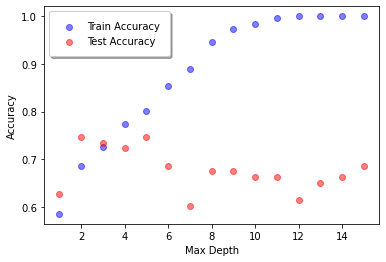

In [35]:
plt.scatter(range(1, len(super_hero_df.columns) + 1), train_acc, color = 'blue', alpha=0.5, label='Train Accuracy')
plt.scatter(range(1, len(super_hero_df.columns) + 1), test_acc, color = 'red', alpha=0.5, label='Test Accuracy')
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [36]:
# print(test_acc)
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf = tree_clf.fit(x_train, y_train)

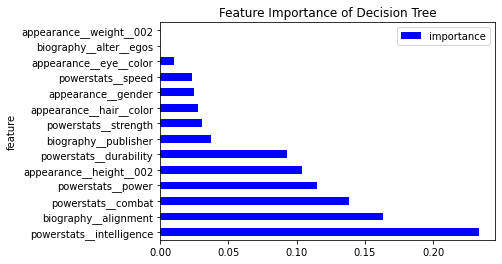

In [37]:
importance = tree_clf.feature_importances_
features = x_train.columns
stats = pd.DataFrame({'feature':features, 'importance':importance})

top_10 = stats.sort_values('importance', ascending=False)
top_10.plot(y='importance', x='feature', kind='barh', color='blue')
plt.title('Feature Importance of Decision Tree');

In [38]:
y_pred = tree_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7469879518072289


Confusion Matrix:


<AxesSubplot:>

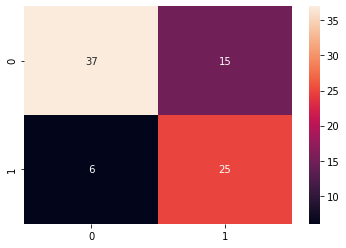

In [39]:
print("Confusion Matrix:")
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='2')

Benchmark Confusion Matrix:


<AxesSubplot:>

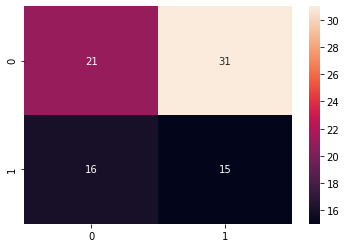

In [40]:
# building Benchmark model
pred = list(y_pred)
bench_pred = []
for x in pred:
    if random() < sum(pred) / len(pred) :
        bench_pred.append(1)
    else :
        bench_pred.append(0)
        
bench_pred = np.array(bench_pred)
print("Benchmark Confusion Matrix:")
sns.heatmap(metrics.confusion_matrix(y_test, bench_pred), annot=True, fmt='2')

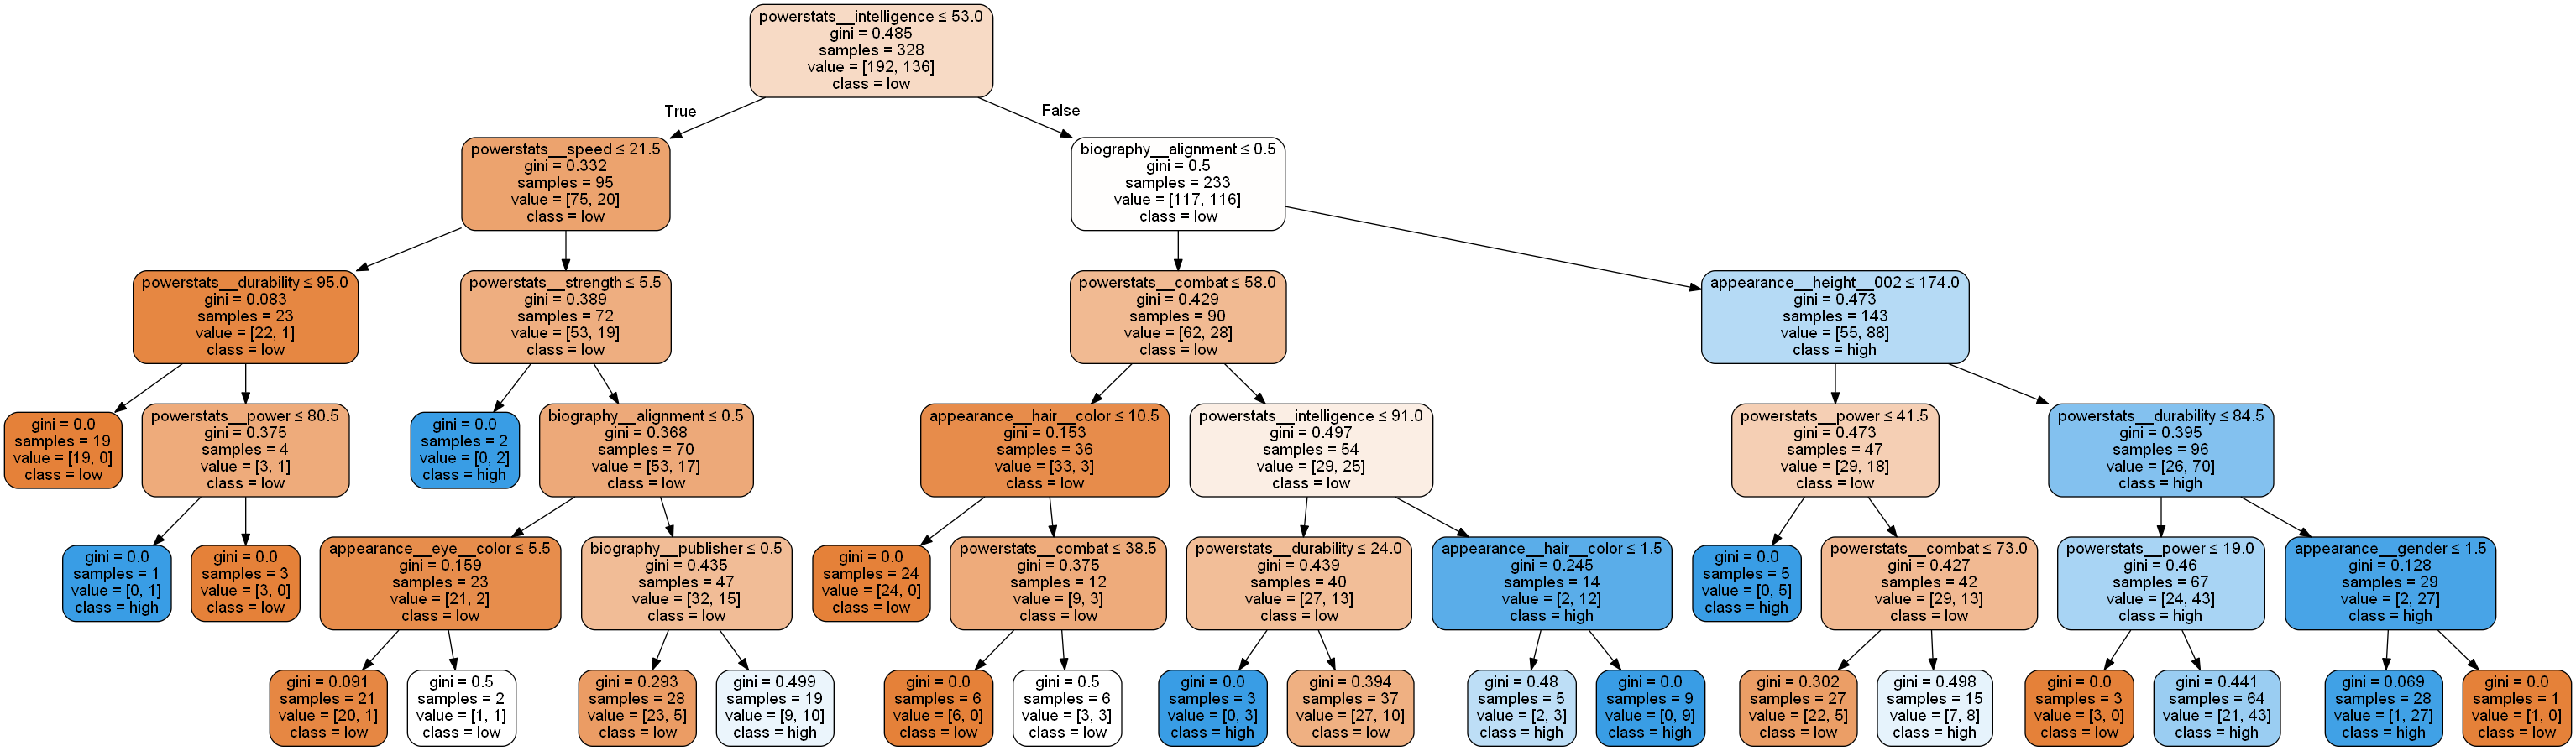

In [54]:
dot_data = StringIO()
export_graphviz(tree_clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                class_names=['low','high'],
                feature_names = list(x_train.columns))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('tree_graph.pdf')
Image(graph.create_png())

# ################################################################